Covariance matrix:

$$C = \frac{1}{m-1} \sum_{i=1}^m (X_i - \bar{X})(X_i - \bar{X})^T$$

where $X$ is an $m \times n$ data matrix ($m$ instances, $n$ features) and $X_i$ is the feature vector for instance $i$.

Largest eigenvalue of $C$ indicates first principal component, second largest is second, etc.

Relation to SVD:

$$M = U \Sigma V^T$$

Calculate the covariance matrix of M:

$$C = M^T M = V \Sigma U^T U \Sigma V^T = V \Sigma^2 V^T$$

$\Sigma^2$ is diagonal, so $V$ is the rotation matrix that diagonalizes the covariance matrix.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
X = random.multivariate_normal([0.0, 0.0],[[1.0,0.9],[0.9,1.0]], size=100)

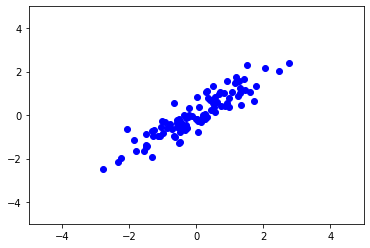

In [4]:
axis([-5,5,-5,5])
plot(X[:,0], X[:,1], 'bo')

In [5]:
dot(X.T-mean(X.T),X-mean(X))*(1.0/(100.0-1.0))

array([[1.18137595, 1.01358417],
       [1.01358417, 1.057253  ]])

In [6]:
C = cov(X,rowvar=False)

In [11]:
w, v = linalg.eig(C)

In [12]:
w

array([2.13479522, 0.10206195])

In [13]:
v

array([[ 0.72837562, -0.68517804],
       [ 0.68517804,  0.72837562]])

In [14]:
v[:,0]

array([0.72837562, 0.68517804])

In [15]:
v[:,1]

array([-0.68517804,  0.72837562])

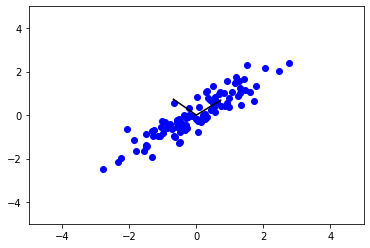

In [17]:
axis([-5,5,-5,5])
plot(X[:,0], X[:,1], 'bo')
plot([0.0,v[:,0][0]],[0.0,v[:,0][1]],'k-')
plot([0.0,v[:,1][0]],[0.0,v[:,1][1]],'k-')

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [22]:
c1 = pca.components_.T[:,0]

In [21]:
c2 = pca.components_.T[:,1]

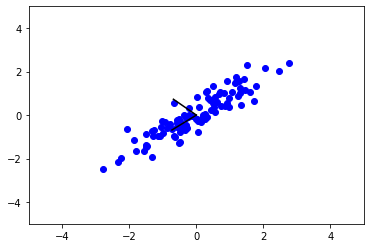

In [25]:
axis([-5,5,-5,5])
plot(X[:,0], X[:,1], 'bo')
plot([0.0,c1[0]],[0.0,c1[1]],'k-')
plot([0.0,c2[0]],[0.0,c2[1]],'k-')

In [26]:
dot(c1,c2)

0.0

In [31]:
Xproj = dot(X, v[:,0])

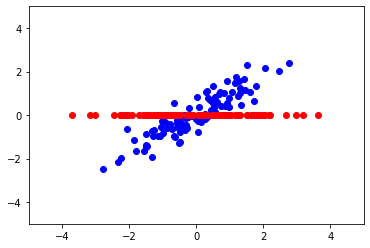

In [47]:
axis([-5,5,-5,5])
plot(X[:,0], X[:,1], 'bo')
plot(Xproj, zeros((len(Xproj))),'ro')

In [36]:
V = array([v[:,0],v[:,1]])

In [45]:
Xrot = zeros((100,2))
for m in range(100):
    xnew = dot(V,X[m,:])
    Xrot[m,:] = xnew

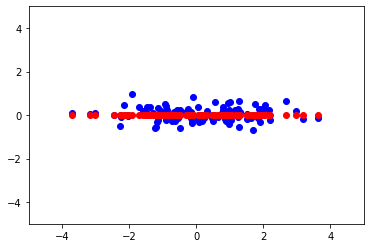

In [49]:
axis([-5,5,-5,5])
plot(Xrot[:,0],Xrot[:,1],'bo')
plot(Xproj, zeros((len(Xproj))),'ro')